# Feature selection House Price Case Study

### Step1: Importing the required liabraries and Import data set

In [182]:
#importing libraries
import sys
sys.executable
import pandas as pd 
import numpy as np 
import scipy.stats as scs
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits.axisartist

import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score 
# Supress Warnings
from scipy.stats import norm
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [183]:
#read dataset
home =pd.read_csv('train.csv')
home.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Description

In [184]:
#describe the dataset to get details about.
#data description gives the information of mean,max,min,std.daviation and median these
#properties are usefull to get the insights of dataset
home.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [185]:
#check the dimenssion of data set
home.shape


(1460, 81)

In [186]:
#here the following data shows the data type of variables and number of non-null values present in the columns
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [187]:
#i want to get how many attributes are there which actually contains the null value so info() will provide information about it.
NA_col = home.isnull().sum()
NA_col

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

* here it is clearly seen that the variables PoolQC,Fence,MiscFeature , FireplaceQu are those which have high amount of null values 

In [188]:
#Find the percentage of null values in each column:

round(100*(home.isnull().sum()/len(home.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [189]:
#we will treat the null values letter in the assignment

In [190]:
#first have a look at row wise null values in the dataset first check are there more than 30% of null values in the row then delete that.
#but in the next cell we can see that there are no rows with MORE THAN 30% of missing values, thus shape of dataset remains same


In [191]:
#remove the rows which consist more than 80% nan values
home.dropna(thresh=np.int((100-20)*(len(home.columns)/100)),inplace=True,axis=0)
home.shape

(1460, 81)

In [192]:
#ere i want to see if there is any variable with only one value related to it,
#as, when variable does not show any variance with the value then it is of least importance
unique = home.nunique()
unique = unique[unique.values == 1]
unique

Series([], dtype: int64)

In [193]:
#after the execution of above we can say that there is no variable with single unique value present in the dataset

### Data Analysis 

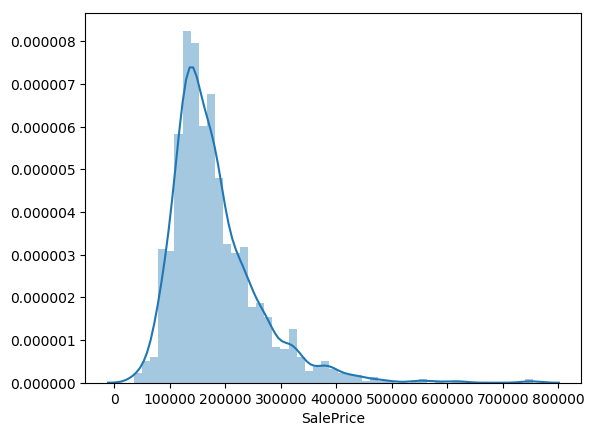

In [194]:
#histogram for the target variable 'SalesPrice'
sns.distplot(home['SalePrice']);

In [195]:
#it can clearly seen from the plot that it is deviated from normal distribution and it shows positive skewness
#skew() gives the ratio of skewness
print("Skewness: %f" % home['SalePrice'].skew())

Skewness: 1.882876


In [196]:
#Bivariate Analysis to find out relation between salesprice to other variables

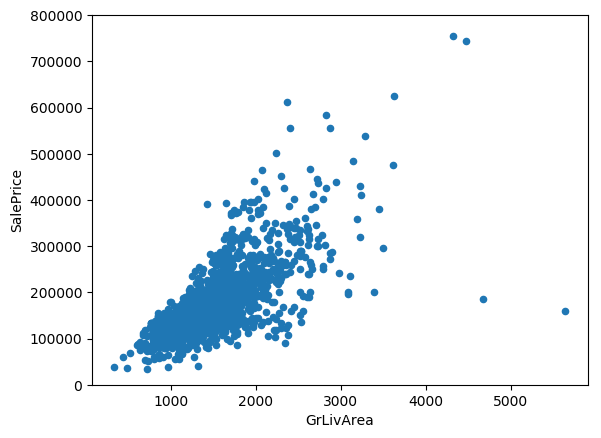

In [197]:
#scatter plot grlivarea/saleprice
#following plot show the linear relationship of variable salesprice and grlilvarea
var = 'GrLivArea'
data = pd.concat([home['SalePrice'], home[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

* above graph shows the linear relationship between variable but also shows some outlier datapoints
* it is infered from the graph that more the above ground living area higher the price of house

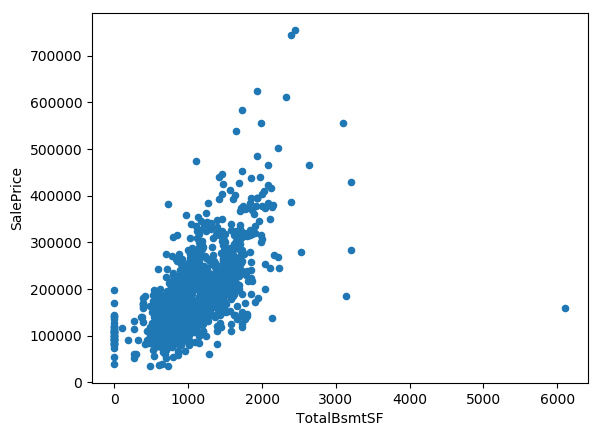

In [198]:
var='TotalBsmtSF'
data=pd.concat([home['SalePrice'],home[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

* again from the above graph the linear relationship between the basement area  and sales price is shown
* it is obvious relation between variable that more the area higher will be the price but here we can see one outlier datapoint which have larger area for vary small price and it may not be the case in any ways
* so when we treat outliers we need to check for these also


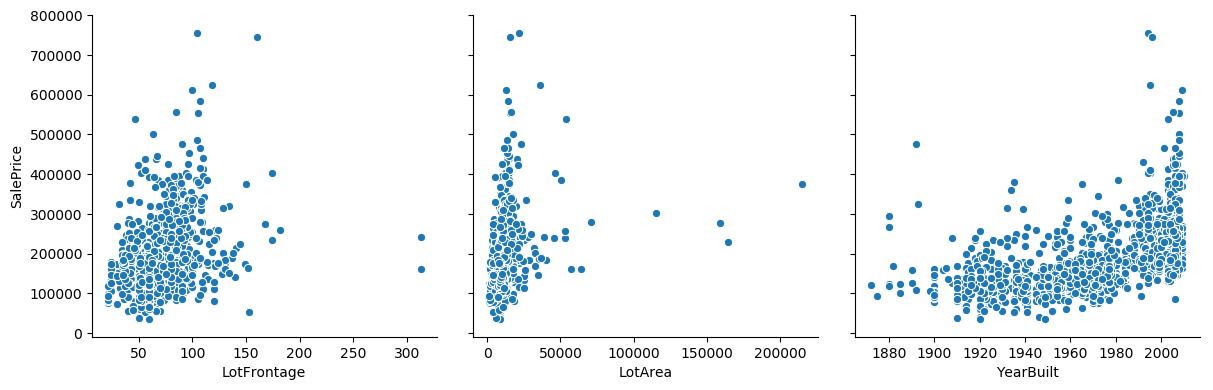

In [199]:
#now to save the place of workbook of course i want to draw plots pairwise 
#following function draw the plots for three varibles at a time
#pairplot for numerical variables
def drawpair(var1,var2,var3):
    sns.pairplot(home,x_vars=[var1,var2,var3],y_vars='SalePrice',height=4,aspect=1,kind='scatter')
    plt.show()

drawpair('LotFrontage','LotArea','YearBuilt')
#drawpair('compressionratio', 'horsepower', 'peakrpm')
#drawpair('wheelbase', 'citympg', 'highwaympg') 

* Linear feet of street connected to property have linear relation with price till some certain values
* more entries in the dataset consisting of lot area less than 50000 square feet and the graph shows as area increases the price also increase
* now the year in which property is cunstructed shows inverse relation to sales as recent poperty tends to have higher price and it is very obvoius

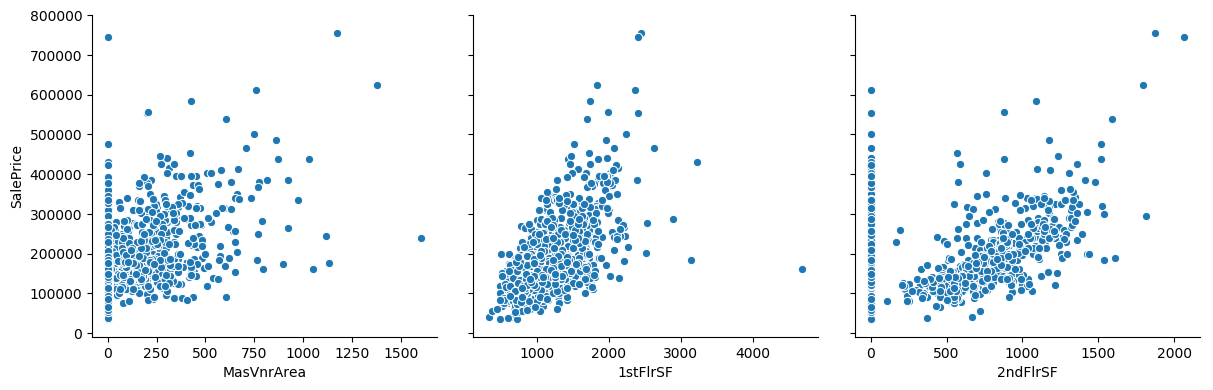

In [200]:
drawpair('MasVnrArea','1stFlrSF', '2ndFlrSF')

* Masonry veneer type area is shows that for greater the area higher will be the price but data points are concentrated in perticular reagion

* surface area of first flore shows linear relation with price of house
* similerly the area of second floor of house tends to have linear relationship with sales price of house but with some exceptional cases

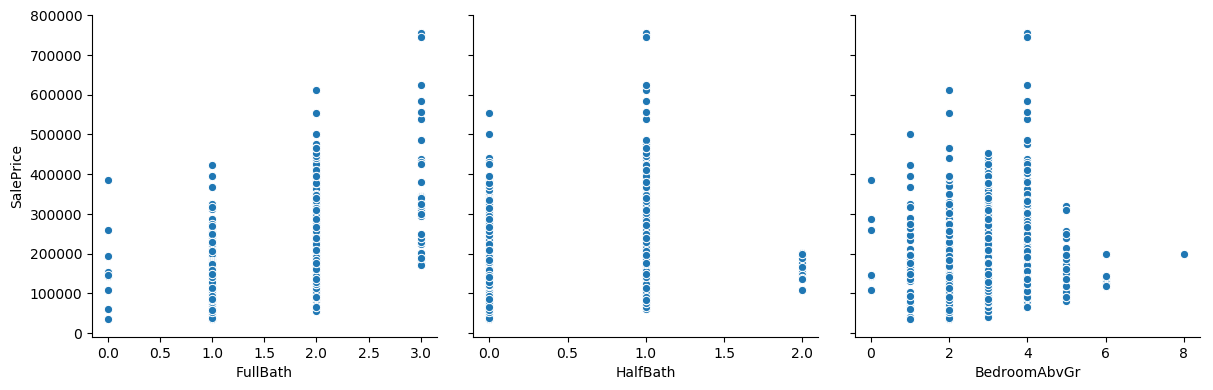

In [201]:
def drawbox(var1,var2,var3):
    sns.pairplot(home,x_vars=[var1,var2,var3],y_vars='SalePrice',height=4,aspect=1,kind='box')
    plt.show
drawpair('FullBath','HalfBath','BedroomAbvGr')

* from the above graph it can be seen that these variables are catagorical rather than the numerical one as the graph for them is shown as fatapoints are for perticular values
* lets analyse them first, number of full bathroom inthe house shows that the 3 bathrooms in a house increases the price of that house
* but it is also seen from the next plot that the house which consist of 1 half bathrrom also tends to have  high price
* people are demanding for 2-4 bedrooms above the ground as for these values the price of the house is high but if you increse the number of bedroom price tends to low

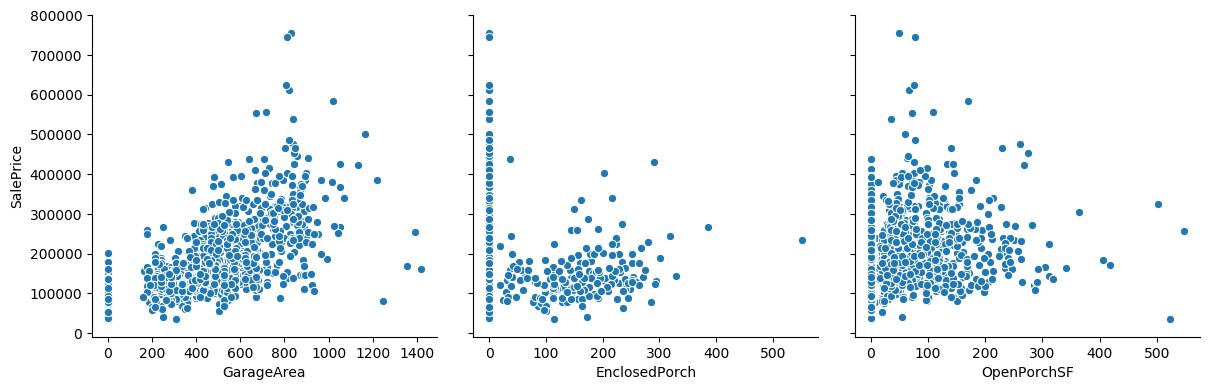

In [202]:
drawpair('GarageArea','EnclosedPorch','OpenPorchSF')

* again the linear relation between garage area and price is found in the data that people needs the large garage 
* now for the enclosed porch seems that buyers are not interested in as the graph shows that even if area is increased the price not tends to get higher
* open Porch attribute shows the higher impact on price of house as the large datapoints are present and shows a linear relationship between variables as area of open porch increse price of the house will also tends to get higher

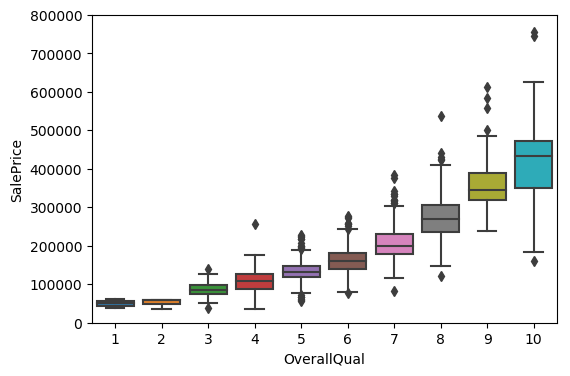

In [203]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([home['SalePrice'], home[var]], axis=1)
f, ax = plt.subplots(figsize=(6,4))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

* the variable  Overall quality shows the rating given to the house where 10 shows higher rating and 1 is the lkower
* and it is vary natural and also shown by the graph that house with higher ratings will earn a good cost

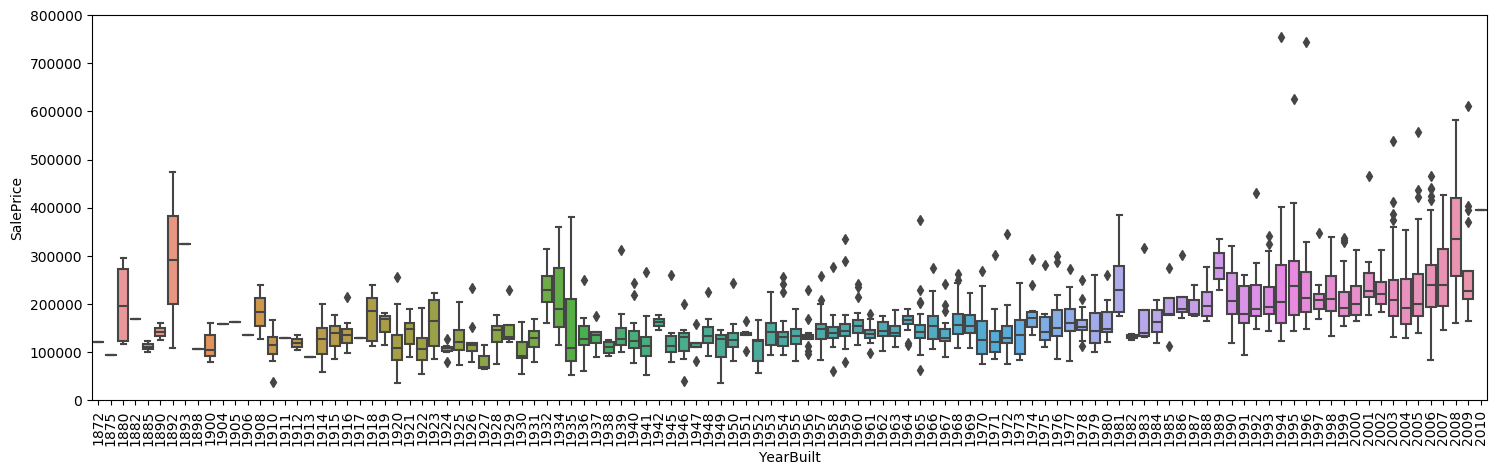

In [204]:
var = 'YearBuilt'
data = pd.concat([home['SalePrice'], home[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 5))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

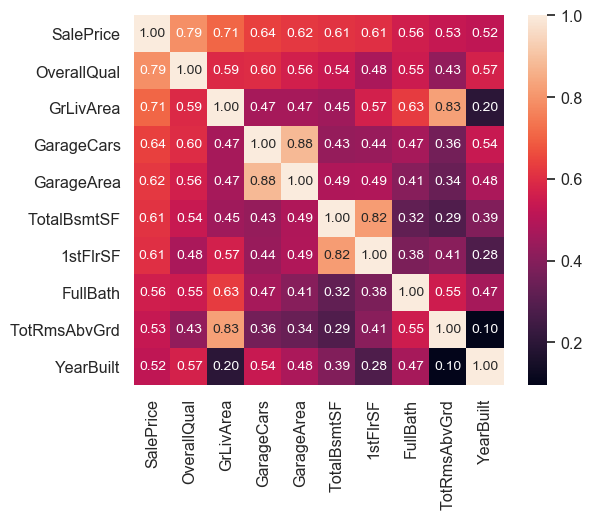

In [209]:
#saleprice correlation matrix
corrmat = home.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(home[cols].values.T)
sns.set(font_scale=1.05)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* from the above correlation graph it can be seen that variable such as Garagecars-garagearea,
* Grlivarea-TotRmsAbvGrd,TotBsmtSf-1stFlrSF,are corrlated to each other
* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'

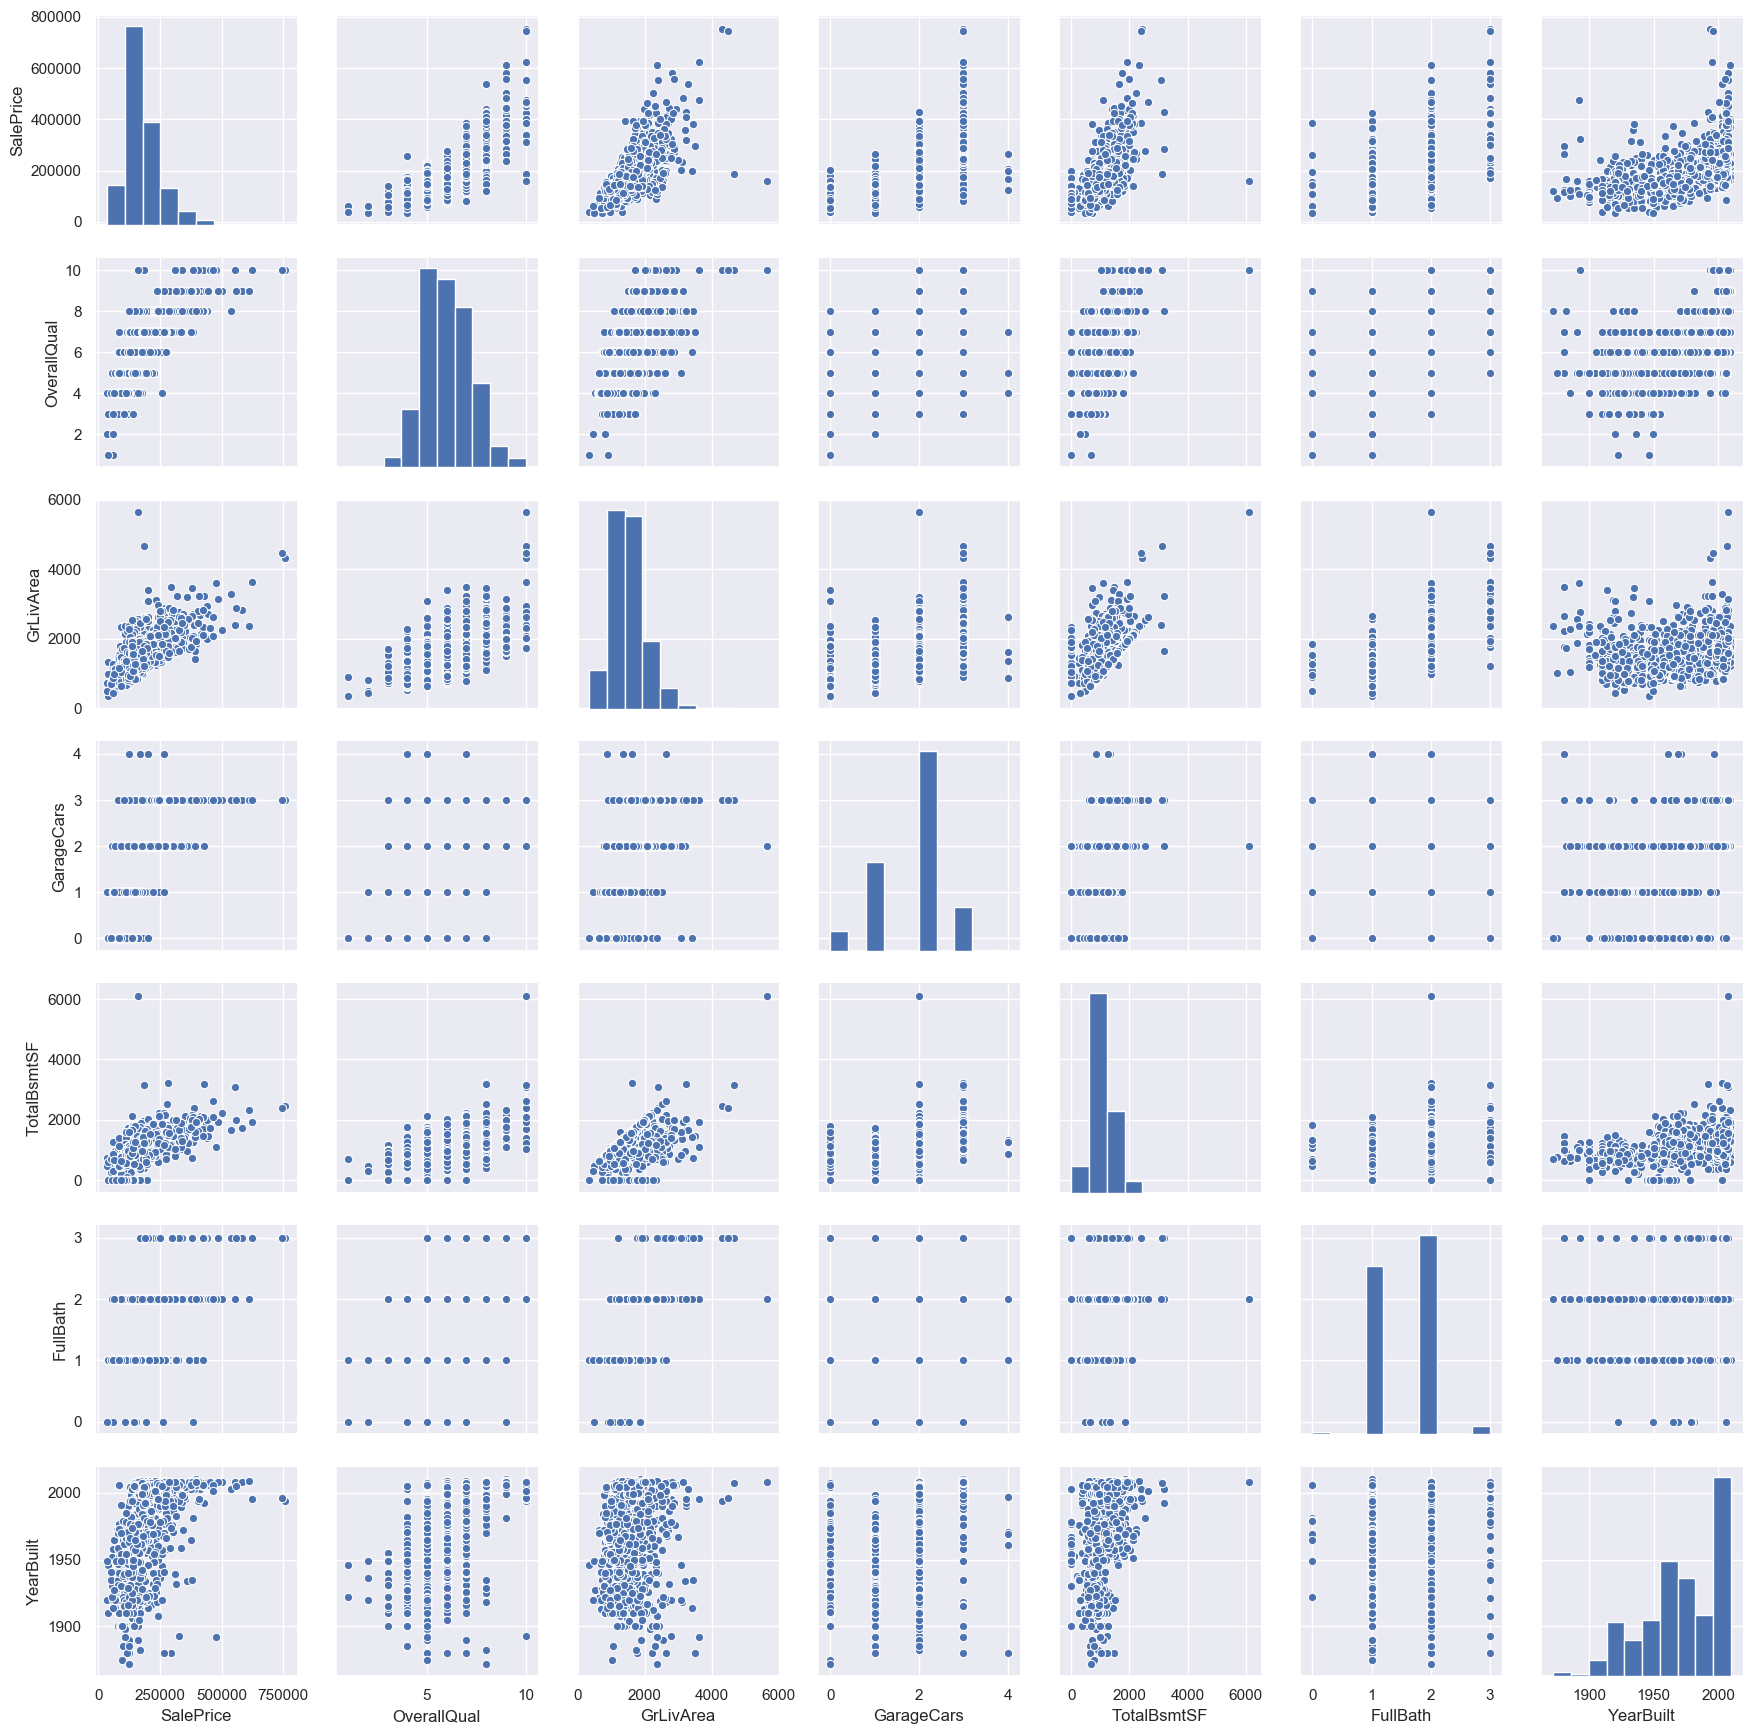

In [210]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(home[cols], size = 2.5)
plt.show();

* Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.


* One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).



* The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

### Data Imputaion for  missing values

In [211]:
home_na = (home.isnull().sum() / len(home)) * 100
home_na = home_na.drop(home_na[home_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :home_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

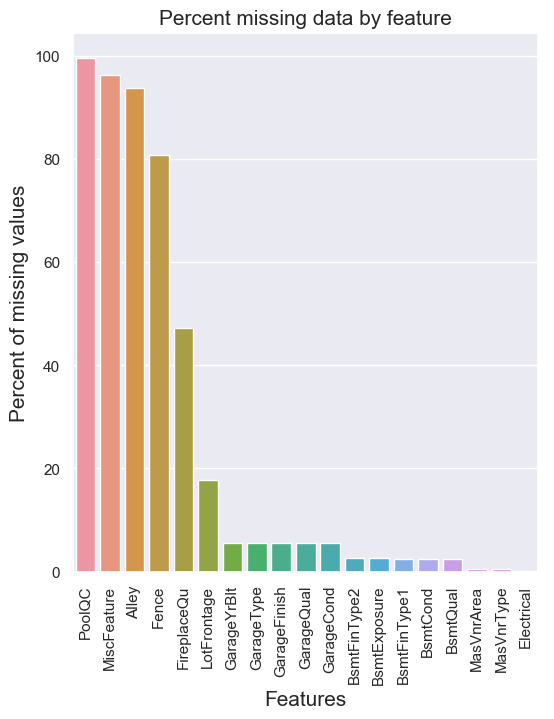

In [212]:
f, ax = plt.subplots(figsize=(6,7))
plt.xticks(rotation='90')
sns.barplot(x=home_na.index, y=home_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

* as we seen above some of the variables have more than 80% of missing values 
* but after going through the data description it is come to know that the nan are not actually a missing data but for some categorical variable where not applied or not used also taken as nan
* thus imputing the None inplace of nan  for variables PoolQc,MiscFeature,Alley,Fence,Garage type
* as given if there is no garage present then the variables related to it such as Garagearea,GarageQual,GarageCars,GarageYrBlt will also not there thus imputing 0 in place of nan
* MasVnrType same  with this variable not present then imputed None and for MasVnrArea imputed 0
* Functional for this the Typ is most occuring value thus imputed nan with it
* other attributes related to the Basement area,surface area,half bathroom , full bathroom are imputed with 0

In [213]:
home["PoolQC"] = home["PoolQC"].fillna("No pool")

In [214]:
home["MiscFeature"] = home["MiscFeature"].fillna("No Misc")


In [215]:
home["Alley"] = home["Alley"].fillna("No Alley")
home["Fence"] = home["Fence"].fillna("No Fence")
home["FireplaceQu"] = home["FireplaceQu"].fillna("No Fireplace")

In [216]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    home[col] = home[col].fillna('None')

In [217]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    home[col] = home[col].fillna(0)

In [218]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    home[col] = home[col].fillna(0)

In [219]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    home[col] = home[col].fillna('None')

In [220]:
home["MasVnrType"] = home["MasVnrType"].fillna("None")
home["MasVnrArea"] = home["MasVnrArea"].fillna(0)

In [221]:
#home = home.drop(['Utilities'], axis=1)

In [222]:
home["Functional"] = home["Functional"].fillna("Typ")

In [223]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
home["LotFrontage"] = home.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [224]:
#Check remaining missing values if any 
home_na = (home.isnull().sum() / len(home)) * 100
home_na = home_na.drop(home_na[home_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :home_na})
missing_data.head(20)

,Missing Ratio
Electrical,0.068493


### data Preperation

In [225]:
#converting year to number of years
home['YearBuilt'] = 2019 - home['YearBuilt']
home['YearRemodAdd'] = 2019 - home['YearRemodAdd']
home['GarageYrBlt'] = 2019 - home['GarageYrBlt']
home['YrSold'] = 2019 - home['YrSold']

* the variable related to Year values are need to be converted to the number of year as it is easy to analyse


In [226]:
#MSSubClass=The building class
home['MSSubClass'] = home['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
home['OverallCond'] = home['OverallCond'].astype(str)




In [227]:
#create the variable TotalSFarea combine the surface area of aentire house 

In [228]:
home['TotalSFArea'] = home['TotalBsmtSF'] + home['1stFlrSF'] + home['2ndFlrSF']

* following variables are converted to the catagorical variable as going through the data analysis part it is concluded that the givern variables are more likely to be a catagorical variable that the numeric one

In [229]:
#converting from int type to object to treat the variables as categorical variables
home['MSSubClass'] = home['MSSubClass'].astype('object')
home['OverallQual'] = home['OverallQual'].astype('object')
home['OverallCond'] = home['OverallCond'].astype('object')
home['BsmtFullBath'] = home['BsmtFullBath'].astype('object')
home['BsmtHalfBath'] = home['BsmtHalfBath'].astype('object')
home['FullBath'] = home['FullBath'].astype('object')
home['HalfBath'] = home['HalfBath'].astype('object')
home['BedroomAbvGr'] = home['BedroomAbvGr'].astype('object')
home['KitchenAbvGr'] = home['KitchenAbvGr'].astype('object')
home['TotRmsAbvGrd'] = home['TotRmsAbvGrd'].astype('object')
home['Fireplaces'] = home['Fireplaces'].astype('object')
home['GarageCars'] = home['GarageCars'].astype('object')

In [230]:
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
home[varlist1] = home[varlist1].apply(binary_map)

In [231]:


# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
home[varlist3] = home[varlist3].apply(binary_map)

In [232]:
# List of variables to map

varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
home[varlist2] = home[varlist2].apply(binary_map)

### Outlier analysis And Outlier treatment

In [234]:
#outlier analysis
# outlier treatment following function is able to treat theoutliers
def OutlierTreat( x, df):
    
    plt.boxplot(df[x])
    Q1 = df[x].quantile(0.1)
    Q3 = df[x].quantile(0.9)
    IQR = Q3 - Q1
    df = df[(df[x] >= Q1 - 1.5*IQR) & 
                      (df[x] <= Q3 + 1.5*IQR)]
    df.shape

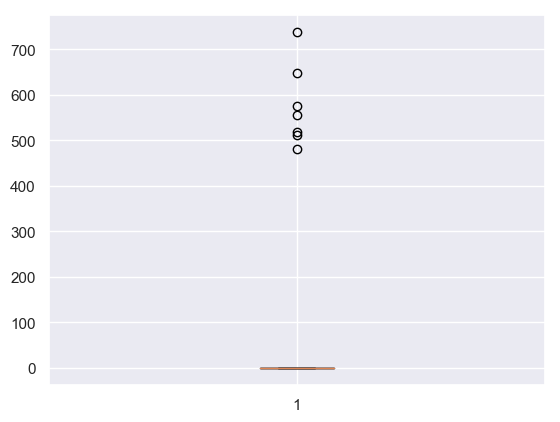

In [235]:
OutlierTreat('PoolArea',home)


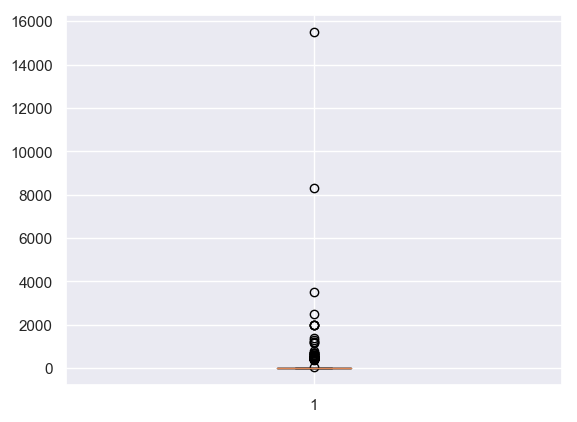

In [236]:
OutlierTreat('MiscVal',home)


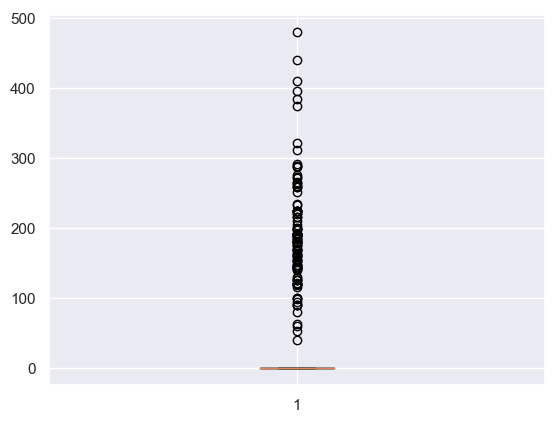

In [237]:
OutlierTreat('ScreenPorch',home)


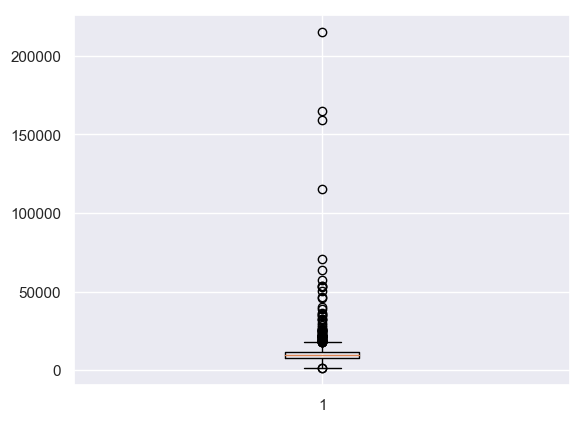

In [238]:
OutlierTreat('LotArea',home)


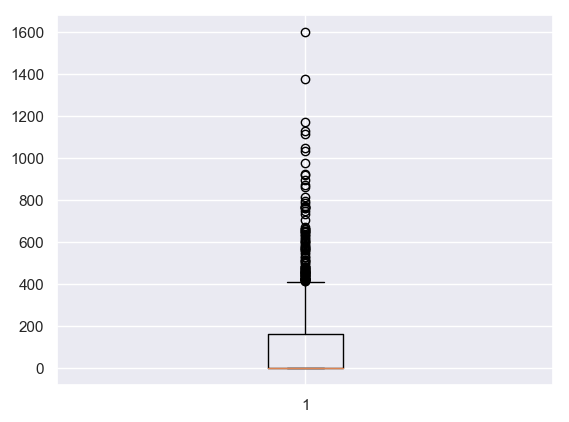

In [239]:
OutlierTreat('MasVnrArea',home)


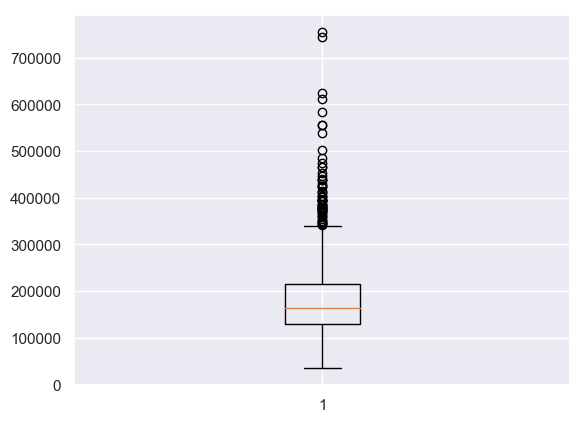

In [240]:
OutlierTreat('SalePrice',home)

### Data Preperation

In [241]:
home.shape

(1460, 82)

In [242]:
# split into X and y
X = home.drop([ 'Id'], axis=1)

In [243]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,TA,TA,Y,No pool,No Fence,No Misc,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No pool,No Fence,No Misc,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No pool,No Fence,No Misc,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No pool,No Fence,No Misc,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No pool,No Fence,No Misc,WD,Normal


In [244]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,

In [245]:
# drop categorical variables 
home = home.drop(list(house_categorical.columns), axis=1)

In [246]:
# concat dummy variables with X
home = pd.concat([home, house_dummies], axis=1)

In [247]:
home.shape

(1460, 319)

In [248]:
# split the data in 7:3 ratio for traing and test purpose respectively
df_train, df_test = train_test_split(home, train_size = 0.7, test_size = 0.3, random_state = 100)

In [249]:
scaler = MinMaxScaler()
norm = [ 'LotFrontage', 'LotArea',  'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',   
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF','SalePrice','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
df_train[norm] = scaler.fit_transform(df_train[norm])
df_train.head()

,Id,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSFArea,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functio

In [250]:

df_train= df_train.loc[:, df_train.columns.isin(norm)]
df_train.shape

(1021, 25)

In [251]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [252]:
X_train.shape

(1021, 24)

In [253]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,7)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [254]:
# name of variables which are supported by rfe
col = X_train.columns[rfe.support_]
col

Index(['YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'PoolArea'],
      dtype='object')

In [255]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     349.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          7.13e-265
Time:                        23:11:56   Log-Likelihood:                 1433.6
No. Observations:                1021   AIC:                            -2851.
Df Residuals:                    1013   BIC:                            -2812.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0336      0.009      3.930      

In [256]:
X_train_new = X_train_rfe.drop(["1stFlrSF"], axis = 1)

In [257]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [258]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     405.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          2.86e-265
Time:                        23:11:59   Log-Likelihood:                 1431.4
No. Observations:                1021   AIC:                            -2849.
Df Residuals:                    1014   BIC:                            -2814.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0391      0.008      4.804      

In [259]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,18.95
4,GrLivArea,5.66
3,2ndFlrSF,4.28
2,TotalBsmtSF,3.30
5,GarageArea,1.68
1,YearBuilt,1.40
6,PoolArea,1.08


In [260]:
#remove 2ndFlrSF
X_train_new = X_train_new.drop(["2ndFlrSF"], axis = 1)

In [261]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     486.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.27e-266
Time:                        23:12:02   Log-Likelihood:                 1431.4
No. Observations:                1021   AIC:                            -2851.
Df Residuals:                    1015   BIC:                            -2821.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0396      0.008      5.017      

In [262]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,17.82
4,GarageArea,1.66
2,TotalBsmtSF,1.56
3,GrLivArea,1.48
1,YearBuilt,1.37
5,PoolArea,1.08


In [263]:
# the r2 score for linear regression model is 0.706 which is not satiefying the need of regression

## Advance Regression technique

In [264]:
home.shape

(1460, 319)

In [265]:
#Putting feature variable to X
X = home.drop(['SalePrice'], axis=1)

In [266]:
y = home['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [267]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
print(X_train.shape )
print( X_test.shape)

(1168, 318)
(292, 318)


### Ridge and Lasso Regression
* Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.



### ridge Regression

In [268]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)
#y_train.shape


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [269]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-17707.98128026998


In [270]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018749,0.006250,0.006250,0.007654,0.0001,{'alpha': 0.0001},-19144.795266,-17367.725997,-21518.928712,-21507.905313,-18359.173728,-19579.099923,1676.424945,25,-10680.581693,-11397.925993,-11580.339805,-11468.740299,-11059.515357,-11237.420629,328.202440
1,0.018752,0.006247,0.000000,0.000000,0.001,{'alpha': 0.001},-19246.484735,-17344.426641,-21525.577697,-21650.611682,-18308.292478,-19614.454719,1720.063616,26,-10737.926903,-11397.874569,-11580.873645,-11529.955483,-11133.138348,-11275.953790,310.556544
2,0.015619,0.000011,0.000000,0.000000,0.01,{'alpha': 0.01},-19195.594139,-17180.740443,-21535.849458,-21748.031499,-17952.886910,-19522.059122,1847.074473,24,-10831.393792,-11404.127139,-11586.922691,-11636.069417,-11268.745039,-11345.451616,288.565122
3,0.015624,0.000008,0.006252,0.007657,0.05,{'alpha': 0.05},-18837.181597,-16930.230452,-21399.491007,-21305.335583,-17392.451556,-19172.636745,1887.576839,23,-10993.096711,-11485.577182,-11606.111603,-11685.215060,-11482.906972,-11450.581506,241.165705
4,0.015620,0.000015,0.003122,0.006243,0.1,{'alpha': 0.1},-18714.771964,-16833.330458,-21233.502258,-20990.436283,-17513.205389,-19056.715758,1784.461920,22,-11220.097005,-11665.727837,-11622.635421,-11803.241349,-11724.365719,-11607.213466,202.816421
5,0.012499,0.006250,0.000000,0.000000,0.2,{'alpha': 0.2},-18631.155162,-16975.791755,-20985.761597,-20631.932791,-17826.287552,-19009.810901,1563.372084,15,-11636.328163,-12040.671611,-11669.457830,-12070.446598,-12153.884557,-11914.157752,216.780181
6,0.012496,0.006248,0.003125,0.006250,0.3,{'alpha': 0.3},-18656.251783,-17046.430677,-20799.476459,-20429.585826,-18146.107451,-19015.104213,1410.643746,17,-11968.545755,-12362.463123,-11734.637941,-12274.280549,-12461.553010,-12160.296076,269.285257
7,0.020419,0.006308,0.000800,0.001600,0.4,{'alpha': 0.4},-18656.814027,-17159.287352,-20641.605594,-20277.382102,-18381.608743,-19022.815324,1282.015863,18,-12238.863609,-12614.805229,-11803.593990,-12439.805970,-12701.222585,-12359.658277,319.996450
8,0.013599,0.001958,0.001599,0.001959,0.5,{'alpha': 0.5},-18694.823352,-17259.102099,-20525.615515,-20147.912374,-18536.380167,-19032.236942,1181.880619,20,-12455.177418,-12820.989523,-11872.401769,-12579.281396,-12899.572278,-12525.484477,363.763421
9,0.014397,0.001958,0.000799,0.001599,0.6,{'alpha': 0.6},-18724.550360,-17330.311715,-20429.050839,-20037.949831,-18650.276458,-19033.897558,1105.001196,21,-12640.912659,-12989.843870,-11933.524738,-12699.049584,-13065.268920,-12665.719954,400.632448


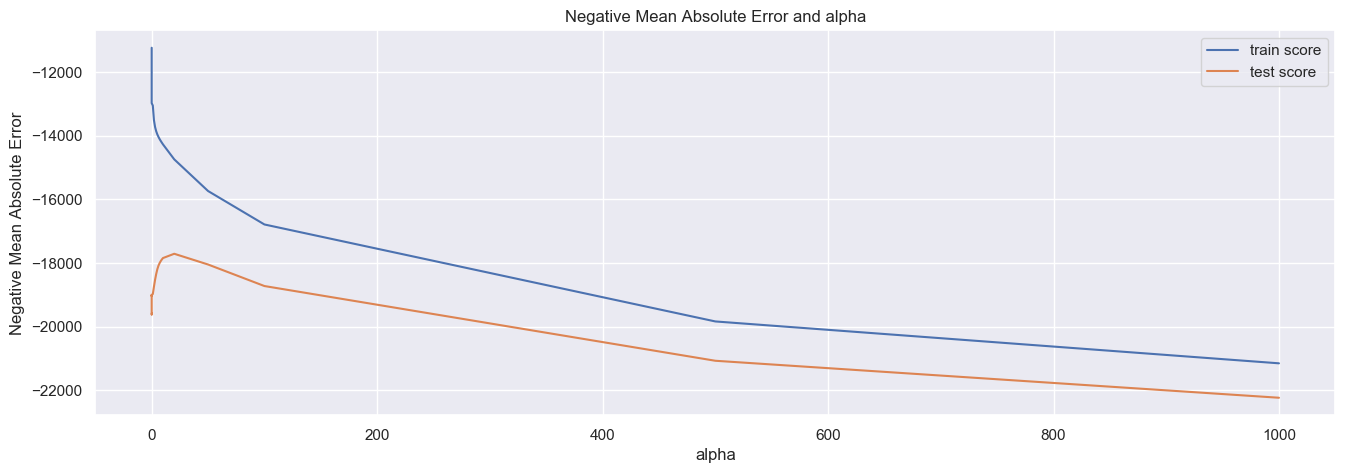

In [271]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [274]:
alpha = 20

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.43061796e+00, -1.45467698e+02,  4.44290437e-01,  2.68525453e+03,
        1.41851479e+03, -3.19134542e+02, -1.91661655e+02,  2.40830883e+01,
       -4.06807038e+00,  4.90279932e+00, -9.65996926e+00, -8.82524020e+00,
        5.32401440e+03,  9.56140911e+00,  2.13706599e+01, -9.50692275e+00,
        2.14251460e+01, -4.92392880e+00,  1.17050777e+01,  1.04717333e+01,
        6.22926596e+00,  1.20235201e+01,  7.49354374e+01,  3.39496392e+01,
       -1.67059984e+01,  5.80820935e-01, -1.54861552e+02,  3.57907865e+01,
        2.21068284e+01, -8.50643316e+03, -1.79755112e+03, -2.36318398e+03,
        7.60094909e+03,  1.94494954e+03,  1.63377515e+03,  4.22060129e+03,
        1.95231463e+02, -2.70884976e+03,  4.35149671e+03, -1.55601216e+03,
        2.13359338e+03,  4.49368384e+02,  3.33347965e+02,  7.00139162e+03,
        5.33629093e+02,  4.25938782e+03, -2.15481462e+03,  4.19115034e+02,
       -6.42191643e+02,  9.86569379e+02, -5.74130803e+03, -4.77478993e+02,
        6.08063567e+03,  

In [275]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))


0.8954618409808967


In [276]:
alpha =20

ridge = Ridge(alpha=alpha)

ridge.fit(X_test,y_test)

preds1 = ridge.predict(X_test)
final_predictions1 = np.exp(preds1)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.967393231732458


### Lasso regression

In [277]:


X_train_rfeL = X_train[col]

In [278]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   53.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [279]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.377506,0.036527,0.002400,0.001959,0.0001,{'alpha': 0.0001},-19495.200028,-16548.856445,-20781.012334,-21341.949154,-18100.709336,-19252.744460,1754.956298,26,-10804.652673,-11414.593586,-11579.459936,-11643.341493,-11230.760546,-11334.561647,301.099142
1,0.370986,0.041713,0.004722,0.005730,0.001,{'alpha': 0.001},-19494.549568,-16547.141830,-20777.425386,-21354.507374,-18100.428434,-19254.001173,1757.867897,27,-10804.635492,-11414.581840,-11579.456203,-11643.360564,-11230.750353,-11334.556891,301.108572
2,0.372417,0.040196,0.001600,0.001959,0.01,{'alpha': 0.01},-19488.101657,-16529.997661,-20741.767844,-21391.639560,-18097.283888,-19248.911027,1766.195204,25,-10804.685670,-11414.592064,-11579.529429,-11643.540628,-11230.999721,-11334.669502,301.123117
3,0.388932,0.050261,0.004131,0.006062,0.05,{'alpha': 0.05},-19459.703259,-16459.418900,-20614.648981,-21335.602427,-18083.904864,-19189.766820,1754.245940,24,-10805.494010,-11415.083647,-11580.266827,-11644.435518,-11232.566200,-11335.569240,301.060526
4,0.351290,0.050233,0.000797,0.001594,0.1,{'alpha': 0.1},-19424.177867,-16396.733245,-20503.241249,-21274.613071,-18064.617952,-19131.757261,1742.349498,23,-10806.956086,-11415.363896,-11581.384539,-11645.637402,-11234.596174,-11336.787620,300.850334
5,0.319466,0.009245,0.001600,0.001959,0.2,{'alpha': 0.2},-19383.644008,-16347.585627,-20553.890910,-21204.920172,-18008.436302,-19098.827283,1754.680591,22,-10810.841065,-11416.024265,-11583.329731,-11648.314472,-11238.650019,-11339.431910,300.108728
6,0.331928,0.027234,0.000797,0.001593,0.3,{'alpha': 0.3},-19358.801710,-16298.565962,-20541.186864,-21176.218348,-17947.657062,-19063.634188,1767.858709,21,-10814.986721,-11416.525587,-11585.777972,-11651.635616,-11243.220978,-11342.429375,299.451281
7,0.331795,0.021041,0.003125,0.006250,0.4,{'alpha': 0.4},-19335.611702,-16281.423432,-20527.802655,-21145.911965,-17889.404522,-19035.206151,1770.394704,20,-10819.408470,-11417.417725,-11588.367603,-11654.869211,-11248.067162,-11345.626034,298.707722
8,0.325602,0.031230,0.002398,0.001958,0.5,{'alpha': 0.5},-19312.870765,-16283.740070,-20514.811950,-21117.018565,-17831.278190,-19011.152462,1767.448926,19,-10824.724585,-11418.537771,-11591.117019,-11658.368028,-11253.542245,-11349.257930,297.704985
9,0.334570,0.027630,0.000000,0.000000,0.6,{'alpha': 0.6},-19290.510008,-16284.440115,-20503.588733,-21087.634946,-17772.447129,-18986.966794,1765.518361,17,-10829.913766,-11419.432718,-11594.542601,-11662.304861,-11259.554207,-11353.149630,296.909698


In [280]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   51.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [281]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.355918,0.023038,0.003196,0.001598,0.0001,{'alpha': 0.0001},0.837175,0.884295,0.553976,0.684630,0.881247,0.768239,0.129576,28,0.964765,0.954615,0.951228,0.955786,0.955668,0.956412,0.004491
1,0.354317,0.053206,0.001593,0.001951,0.001,{'alpha': 0.001},0.837184,0.884340,0.554094,0.684502,0.881249,0.768249,0.129563,27,0.964765,0.954615,0.951228,0.955785,0.955668,0.956412,0.004491
2,0.345679,0.033889,0.003193,0.001596,0.01,{'alpha': 0.01},0.837268,0.884783,0.555229,0.683945,0.881273,0.768476,0.129353,26,0.964765,0.954614,0.951228,0.955784,0.955667,0.956412,0.004491
3,0.359921,0.038521,0.001599,0.001959,0.05,{'alpha': 0.05},0.837628,0.886558,0.556410,0.684893,0.881370,0.769348,0.129216,25,0.964762,0.954613,0.951226,0.955779,0.955664,0.956409,0.004490
4,0.381735,0.037453,0.003928,0.006057,0.1,{'alpha': 0.1},0.838052,0.888010,0.556423,0.685676,0.881659,0.769940,0.129468,24,0.964759,0.954610,0.951224,0.955773,0.955660,0.956405,0.004490
5,0.334081,0.016625,0.003125,0.006251,0.2,{'alpha': 0.2},0.838506,0.888856,0.555218,0.686425,0.882539,0.770284,0.130124,22,0.964750,0.954604,0.951220,0.955758,0.955651,0.956397,0.004489
6,0.337232,0.020228,0.000800,0.001600,0.3,{'alpha': 0.3},0.838842,0.889467,0.555008,0.686827,0.883390,0.770682,0.130435,21,0.964738,0.954597,0.951214,0.955743,0.955640,0.956386,0.004487
7,0.331337,0.031036,0.000800,0.001600,0.4,{'alpha': 0.4},0.839143,0.889433,0.554788,0.687239,0.884188,0.770933,0.130618,20,0.964725,0.954589,0.951207,0.955725,0.955626,0.956374,0.004485
8,0.337851,0.029060,0.000800,0.001600,0.5,{'alpha': 0.5},0.839431,0.889065,0.554584,0.687638,0.884961,0.771110,0.130733,19,0.964709,0.954580,0.951199,0.955706,0.955611,0.956361,0.004483
9,0.329531,0.031753,0.001597,0.001956,0.6,{'alpha': 0.6},0.839713,0.888594,0.554377,0.688033,0.885722,0.771261,0.130828,18,0.964694,0.954570,0.951190,0.955686,0.955594,0.956347,0.004482


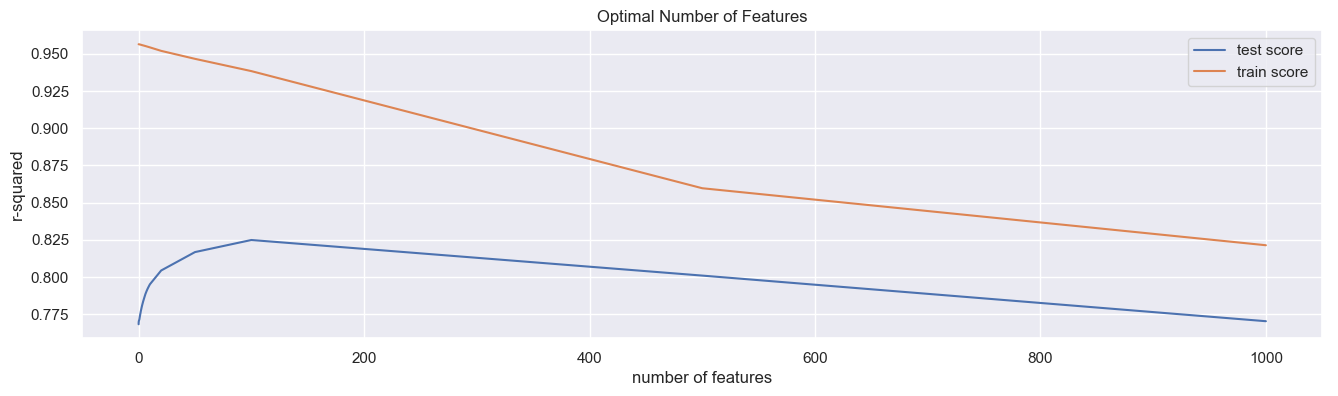

In [282]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [283]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-16330.85976976726


In [284]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [285]:



#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))



0.933337234843023


In [286]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_test, y_test) 


Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [287]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.967393231732458


In [288]:
# Both the models fit the data well and give a good r2-score 
# R2-score for test set in both ridge and lasso is computed as 96% which is gigher than R2 score for Training data

* looking at the RFE the variables which are of most important regarding model are

1 -> GarageArea 

2 	TotalBsmtSF 

3 	GrLivArea

1 	YearBuilt

5 	PoolArea

* comparision of the model looking at the value of lambda it can be easily determined that the Lasso regression with 100 lambda is better model than Ridge with 20
* as the theory says The higher the lambda, the more the coefficients are shrinked thus reduce the variables which are of least use 